## Import modules

In [1]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

## Import Data as pandas dataframe

In [2]:
# Converting a dictionary into a pandas dataframe.
data_set = loadmat("coursework3data.mat")
data = data_set['z']
column_names = ['Feature1', 'Feature2', 'Label']
df = pd.DataFrame(data, columns=column_names)
df['Label'] = df['Label'].astype(int)

## Diagram to show relationship between Feature 1 and Feature 2

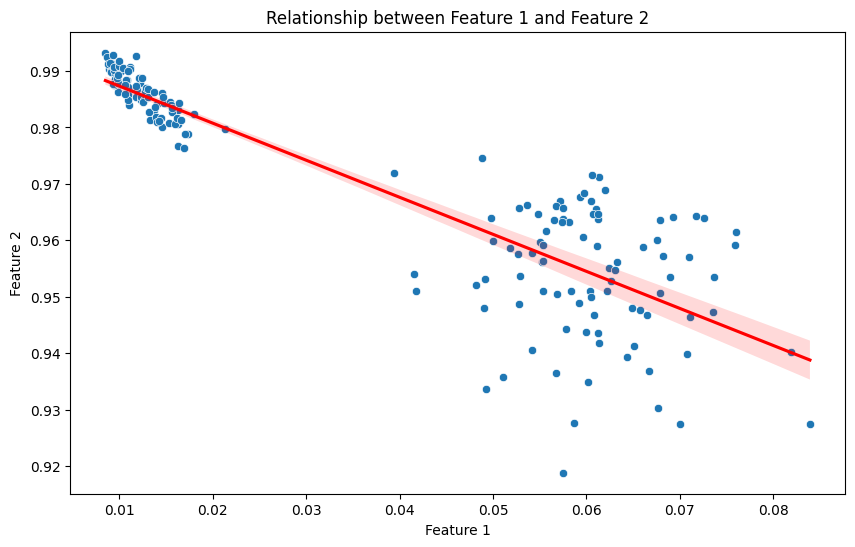

In [3]:
# A scatter plot including the line of best fit.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Feature1', y='Feature2')
sns.regplot(data=df, x='Feature1', y='Feature2', scatter=False, color='red')
plt.title('Relationship between Feature 1 and Feature 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Findings
The graph shows an inverse relationship between Feature 1 and Feature 2

## Diagram to show the relationship between Feature 1 and Labels

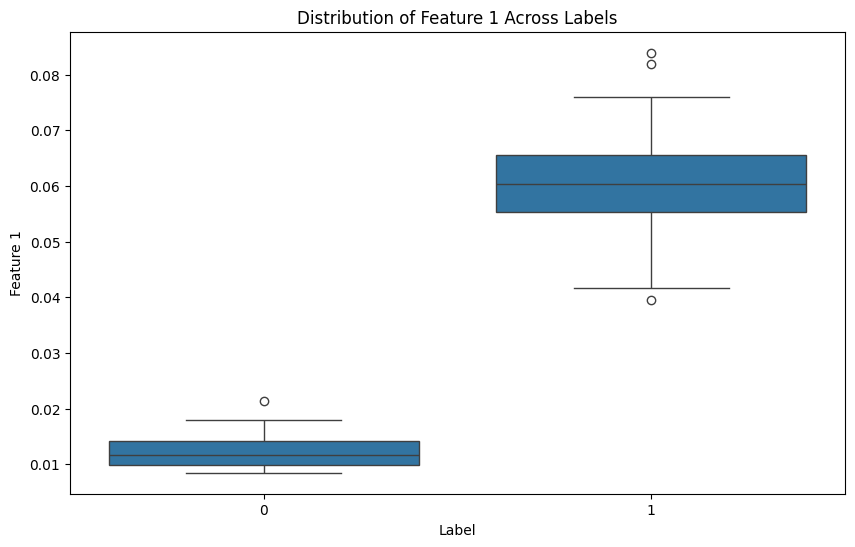

In [4]:
# Using a boxplot to show the individual relationships between the Feature 1 and the labels.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Label', y='Feature1')
plt.title('Distribution of Feature 1 Across Labels')
plt.xlabel('Label')
plt.ylabel('Feature 1')
plt.show()

### Findings
It's observed that the median value of Feature 1 for the group with label 1 is significantly higher than for the group with label 0. This suggests that observations classified under label 1 generally exhibit higher values of Feature 1. Furthermore, the presence of outliers primarily in the label 1 group indicates potential anomalies or a wider range of Feature 1. The spread of data, as indicated by the IQR, shows greater variability in Feature 1 values for label 1, suggesting a diverse set of observations within this group.

## Diagram to show the relationship between Feature 2 and Labels

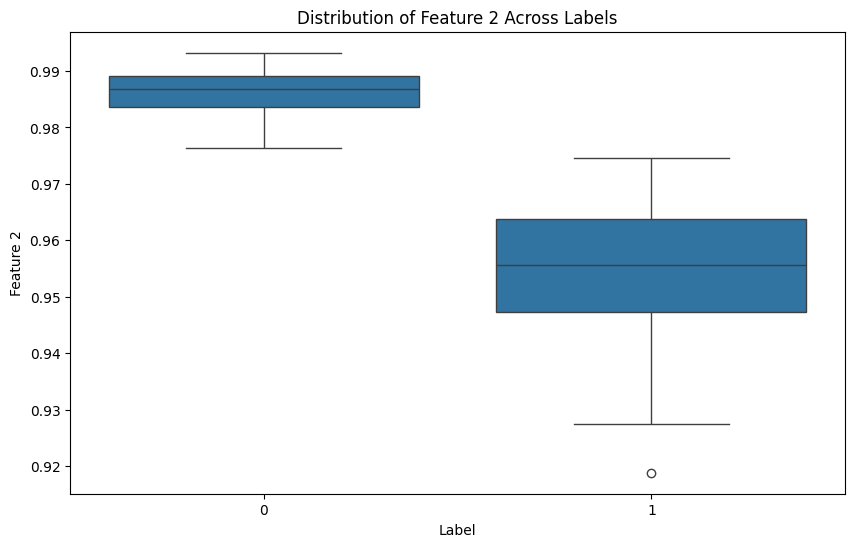

In [5]:
# Using a boxplot to show the individual relationships between the Feature 2 and the labels.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Label', y='Feature2')
plt.title('Distribution of Feature 2 Across Labels')
plt.xlabel('Label')
plt.ylabel('Feature 2')
plt.show()

### Findings
It's observed that the median value of Feature 2 for the group with label 1 is significantly lower than for the group with label 0. This suggests that observations classified under label 1 generally exhibit lower values of Feature 2. Furthermore, the presence of outliers primarily in the label 1 group indicates potential anomalies or a wider range of Feature 2. The spread of data, as indicated by the IQR, shows greater variability in Feature 2 values for label 1, suggesting a diverse set of observations within this group.

## Using 10-Fold Cross Validation

In [6]:
# K-Folds create 10 different folds
kf = KFold(n_splits=10, shuffle=True)
X = df[["Feature1", "Feature2"]].values
y = df[["Label"]].values 

## Decision Trees

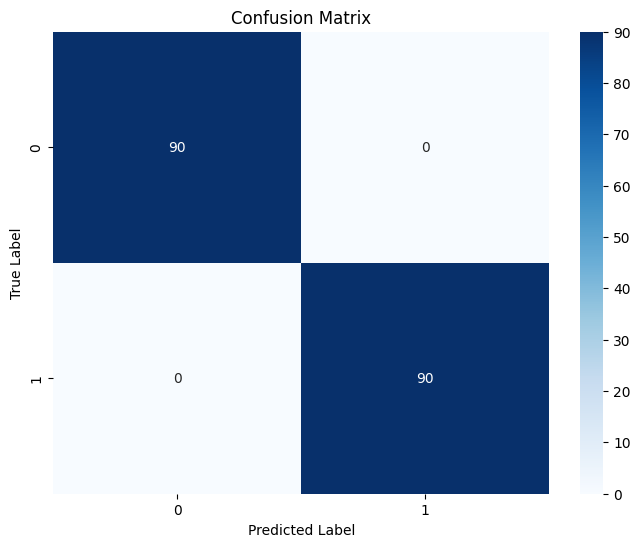

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)

pred_y = clf.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y, pred_y)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

        

## Scores

In [8]:
accuracy = accuracy_score(y, pred_y)
precision = precision_score(y, pred_y)
recall = recall_score(y, pred_y)
f1 = f1_score(y, pred_y)

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

## This Algorithm consistently provided high accuracies.

Test Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


## Random Forest

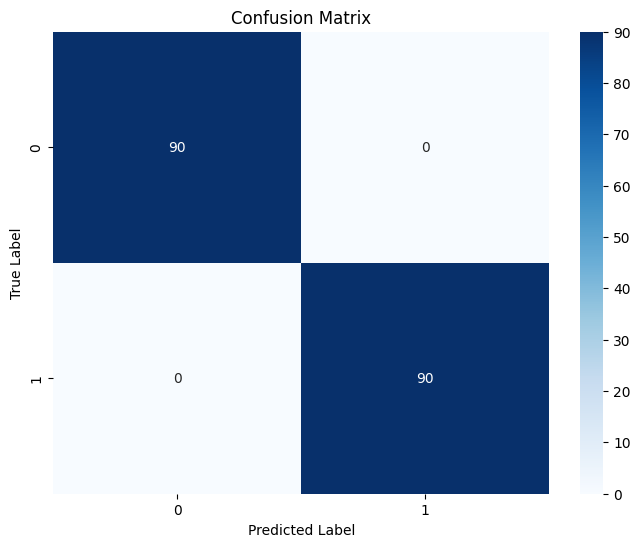

In [9]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    reg.fit(X_train, np.ravel(y_train))

pred_y = np.round(reg.predict(X))

# Compute confusion matrix
cm = confusion_matrix(y, pred_y)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Scores

In [10]:
accuracy = accuracy_score(y, pred_y)
precision = precision_score(y, pred_y)
recall = recall_score(y, pred_y)
f1 = f1_score(y, pred_y)

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

## This algorithm sometimes has a perfect score and also sometimes has many false negatives or false positives.

Test Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


## Linear SVM

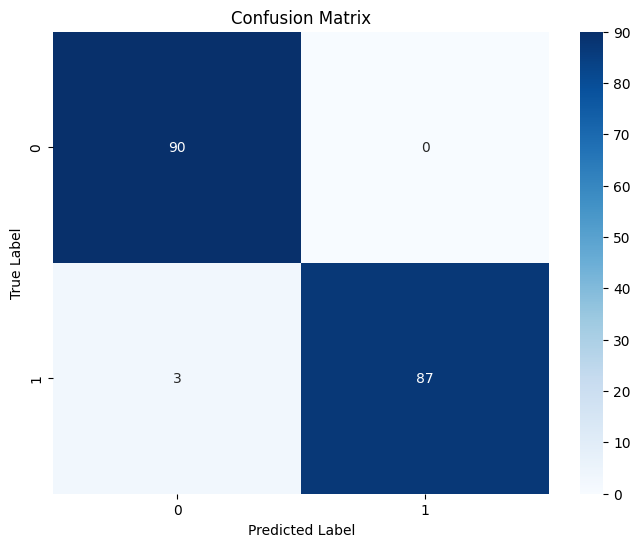

In [11]:
from sklearn import svm

svmc = svm.SVC(kernel="linear")

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svmc.fit(X_train, np.ravel(y_train))

pred_y =  svmc.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y, pred_y)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Scores

In [12]:
accuracy = accuracy_score(y, pred_y)
precision = precision_score(y, pred_y)
recall = recall_score(y, pred_y)
f1 = f1_score(y, pred_y)

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

## This algorthms similarly has fall positives and negatives, but also has high acuracies sometimes.

Test Accuracy: 0.9833333333333333
Precision: 1.0
Recall: 0.9666666666666667
F1 Score: 0.9830508474576272


## SVM with RBF Kernel

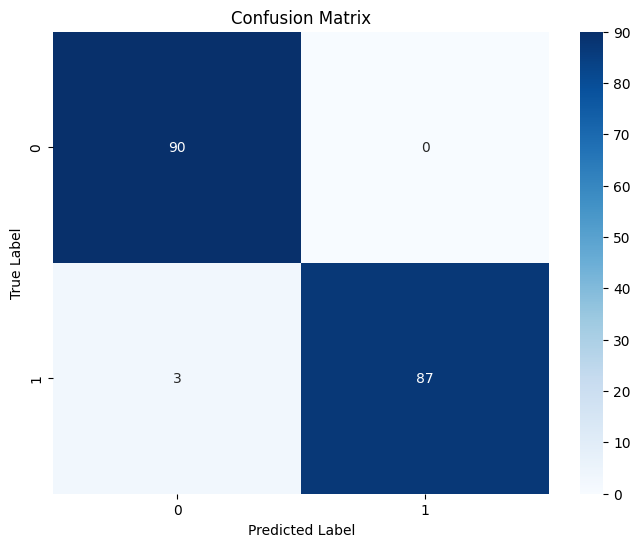

In [13]:
svmf = svm.SVC(kernel="rbf")

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svmf.fit(X_train, np.ravel(y_train))

pred_y =  svmf.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y, pred_y)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Scores

In [14]:
accuracy = accuracy_score(y, pred_y)
precision = precision_score(y, pred_y)
recall = recall_score(y, pred_y)
f1 = f1_score(y, pred_y)

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

## Although not a perfect score, it has stable results with high accuracies.

Test Accuracy: 0.9833333333333333
Precision: 1.0
Recall: 0.9666666666666667
F1 Score: 0.9830508474576272


## Artificial Neural Networks

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


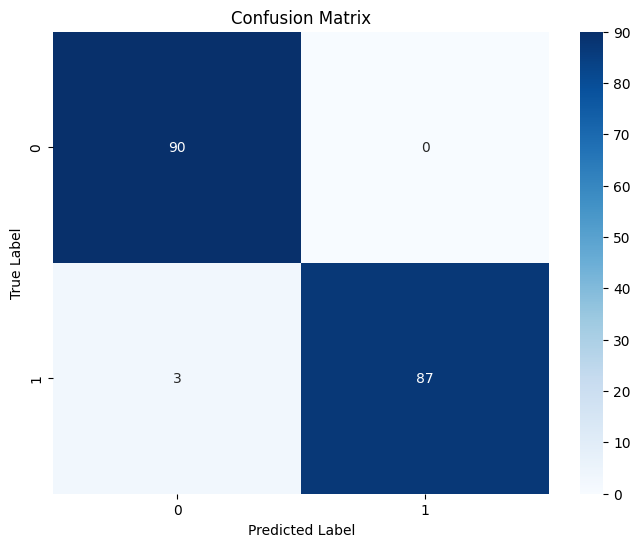

In [15]:
import sklearn.neural_network 

neural_network = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu')

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    neural_network.fit(X_train, np.ravel(y_train))

y_pred = neural_network.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y, pred_y)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Scores

In [16]:
accuracy = accuracy_score(y, pred_y)
precision = precision_score(y, pred_y)
recall = recall_score(y, pred_y)
f1 = f1_score(y, pred_y)

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

## This one also doesn't have a perfect score but has stable results with high accuracies.

Test Accuracy: 0.9833333333333333
Precision: 1.0
Recall: 0.9666666666666667
F1 Score: 0.9830508474576272


## Logistic Regression

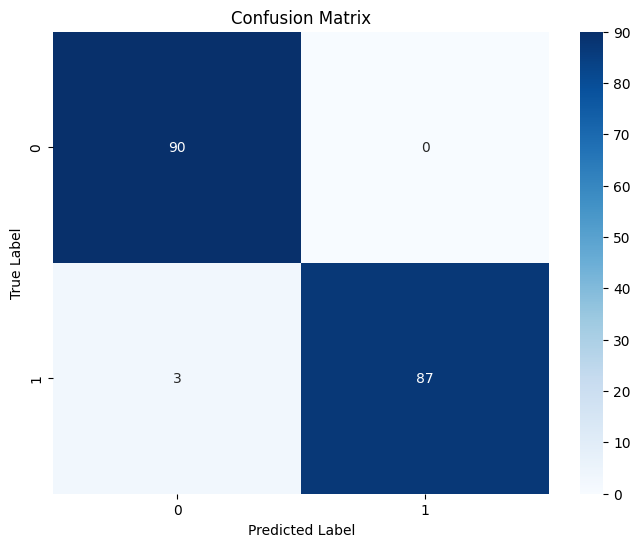

In [17]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logr.fit(X_train, np.ravel(y_train))

y_pred = logr.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y, pred_y)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Scores

In [18]:
accuracy = accuracy_score(y, pred_y)
precision = precision_score(y, pred_y)
recall = recall_score(y, pred_y)
f1 = f1_score(y, pred_y)

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

## This one also doesn't have a perfect score but has stable results with high accuracies.

Test Accuracy: 0.9833333333333333
Precision: 1.0
Recall: 0.9666666666666667
F1 Score: 0.9830508474576272


## Conclusion
Decision Trees, it seems you value interpretability, ease of understanding, and handling of non-linear relationships in the data. Decision Trees offer these advantages while also being less sensitive to feature scaling compared to some other models like SVMs. They also seemed to provide more stable results throughout the testing.